In [32]:
import pandas as pd
import numpy as np

<h1>Exploratory analysis</h1>
<div class=""><p>Whenever you obtain a new dataset, your first task should always be to do some exploratory analysis
to get a better understanding of the data and diagnose it for any potential issues.</p>
<p>The Gapminder data for the 19th century has been loaded into a DataFrame called <code>g1800s</code>. In the IPython Shell, use pandas methods such as <code>.head()</code>, <code>.info()</code>, and <code>.describe()</code>, and DataFrame attributes like <code>.columns</code> and <code>.shape</code> to explore it.</p>
<p>Use the information that you acquire from your exploratory analysis to choose the <strong>true</strong> statement from the options provided below.</p></div>

In [33]:
g1800s = pd.read_csv('g1880s.csv', index_col=0)
print(g1800s.head())
print(g1800s.info())
print(g1800s.columns)
print(g1800s.describe())
print(g1800s.shape)

         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...   1890   1891   1892   1893   1894   1895   1896   1897  \
0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.14  28.13  ...  27.29  27.28  27.27  27.26  27.25  27.24  27.23  27.22   
2    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  ...  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  ...  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1898   1899  
0    NaN    NaN  
1  27.21  27.20  
2 

<h1>Visualizing your data</h1>
<div class=""><p>Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this. </p>
<p>The DataFrame <code>g1800s</code> has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in <code>'1800'</code> on the x-axis and life expectancy in <code>'1899'</code> on the y-axis.</p>
<p>Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!</p></div>

<h2>Instructions:</h2>
<div class="exercise--instructions__content"><ul>
<li>Import <code>matplotlib.pyplot</code> as <code>plt</code>.</li>
<li>Use the <code>.plot()</code> method on <code>g1800s</code> with <code>kind='scatter'</code> to create a scatter plot with <code>'1800'</code> on the x-axis and <code>'1899'</code> on the y-axis.</li>
<li>Display the plot.</li>
</ul></div>

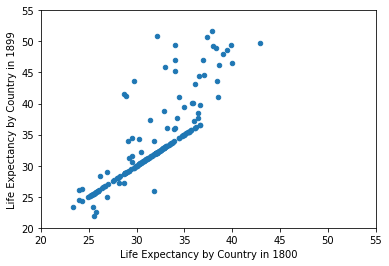

In [34]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

<h1>Thinking about the question at hand</h1>
<div class=""><p>Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.</p>
<p>Before continuing, however, it's important to make sure that the following assumptions about the data are true:</p>
<ul>
<li><code>'Life expectancy'</code> is the first column (index <code>0</code>) of the DataFrame.</li>
<li>The other columns contain either null or numeric values.</li>
<li>The numeric values are all greater than or equal to 0.</li>
<li>There is only one instance of each country.</li>
</ul>
<p>You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.</p></div>

<h2>Instructions:</h2>
<div class="exercise--instructions__content"><ul>
<li>Define a function called <code>check_null_or_valid()</code> that takes in one argument: <code>row_data</code>.</li>
<li>Inside the function, convert <code>no_na</code> to a numeric data type using <code>pd.to_numeric()</code>.</li>
<li>Write an <code>assert</code> statement to make sure the first column (index <code>0</code>) of the <code>g1800s</code> DataFrame is <code>'Life expectancy'</code>.</li>
<li>Write an <code>assert</code> statement to test that all the values are valid for the <code>g1800s</code> DataFrame. Use the <code>check_null_or_valid()</code> function placed inside the <code>.apply()</code> method for this. <ul>
<li>Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the <code>.all()</code> method twice.</li>
<li>Remember that you <strong>don't</strong> have to use <code>()</code> for functions placed inside <code>.apply()</code>.</li></ul></li>
<li>Write an <code>assert</code> statement to make sure that each country occurs only once in the data. Use the <code>.value_counts()</code> method on the <code>'Life expectancy'</code> column for this. Specifically, index <code>0</code> of <code>.value_counts()</code> will contain the most frequently occurring value. If this is equal to <code>1</code> for the <code>'Life expectancy'</code> column, then you can be certain that no country appears more than once in the data.</li>
</ul></div>

In [35]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


<h1>Assembling your data</h1>
<div class=""><p>Here, three DataFrames have been pre-loaded: <code>g1800s</code>, <code>g1900s</code>, and <code>g2000s</code>. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.</p>
<p>Your task in this exercise is to concatenate them into a single DataFrame called <code>gapminder</code>. This is a column-wise concatenation, similar to how you concatenated the Ebola dataset with information about patients in Chapter 3.</p></div>

<h2>Instructions:</h2>
<div class="exercise--instructions__content"><ul>
<li>Use <code>pd.concat()</code> to concatenate <code>g1800s</code>, <code>g1900s</code>, and <code>g2000s</code> along the column axis into one DataFrame called <code>gapminder</code>. Make sure you pass DataFrames to <code>pd.concat()</code> in the form of a list.</li>
<li>Print the shape and the head of the concatenated DataFrame.</li>
</ul></div>

In [36]:
g1900s = pd.read_csv('g1900s.csv', index_col=0)
g2000s = pd.read_csv('g2000s.csv', index_col=0)

# Concatenate the DataFrames column-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=1)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())

(260, 220)
         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  28.14  28.13  ...  52.4  52.8  53.3  53.6  54.0  54.4  54.8  54.9  53.8   
2    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...  76.6  76.8  77.0  77.2  77.4  77.5  77.7  77.9  78.0   
4  28.82  28.82  ...  75.3  75.5  75.7  76.0  76.1  76.2  76.3  76.3  76.4   

    2016  
0    NaN  
1  52.72  
2    NaN  
3  78.10  
4 

<h1>Reshaping your data</h1>
<div class=""><p>Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a <em>tidy</em> data format.</p>
<p>Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.</p>
<p>You can convert the DataFrame into the desired tidy format by <em>melting</em> it.</p></div>

<h2>Instructions:</h2>
<div class="exercise--instructions__content"><ul>
<li>Reshape <code>gapminder</code> by melting it. Keep <code>'Life expectancy'</code> fixed by specifying it as an argument to the <code>id_vars</code> parameter.</li>
<li>Rename the three columns of the melted DataFrame to <code>'country'</code>, <code>'year'</code>, and <code>'life_expectancy'</code> by passing them in as a list to <code>gapminder_melt.columns</code>.</li>
<li>Print the head of the melted DataFrame.</li>
</ul></div>

In [37]:
gapminder = pd.read_csv('gapminder.csv', index_col=0)
print(gapminder.head())
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame=gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

    1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  ...  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12  ...   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  ...   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  ...   

   2008  2009  2010  2011  2012  2013  2014  2015  2016        Life expectancy  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN               Abkhazia  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN            Afghanistan  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Akrotiri and Dhekelia  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                Albania  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                Algeria  

[5 rows x 218 columns]
         

<h1>Checking the data types</h1>
<div class=""><p>Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure
that <code>country</code> is of type <code>object</code>, <code>year</code> is of type <code>int64</code>, and <code>life_expectancy</code> is of type <code>float64</code>.</p>
<p>The tidy DataFrame has been pre-loaded as <code>gapminder</code>. Explore it in the IPython Shell using the <code>.info()</code> method. Notice that
the column <code>'year'</code> is of type <code>object</code>. This is incorrect, so you'll need to use the <code>pd.to_numeric()</code> function to convert it to a numeric data type.</p>
<p>NumPy and pandas have been pre-imported as <code>np</code> and <code>pd</code>.</p></div>

<h2>Instructions:</h2>
<div class="exercise--instructions__content"><ul>
<li>Convert the <code>year</code> column of <code>gapminder</code> using <code>pd.to_numeric()</code>.</li>
<li>Assert that the <code>country</code> column is of type <code>np.object</code>. This has been done for you.</li>
<li>Assert that the <code>year</code> column is of type <code>np.int64</code>.</li>
<li>Assert that the <code>life_expectancy</code> column is of type <code>np.float64</code>.</li>
</ul></div>

In [38]:
gapminder = pd.read_csv('gapminder2.csv', index_col=0)
print(gapminder.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ MB
None


In [39]:
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64


<h1>Looking at country spellings</h1>
<div class=""><p>Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the <code>'country'</code> column
to see if there are any special or invalid characters you may need to deal with.</p>
<p>It is reasonable to assume that country names will contain:</p>
<ul>
<li>The set of lower and upper case letters.</li>
<li>Spaces between words.</li>
<li>Periods for any abbreviations.</li>
</ul>
<p>To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - <code>str.contains()</code> - which takes a regular expression pattern, and applies it to the Series, returning
<code>True</code> if there is a match, and <code>False</code> otherwise.</p>
<p>Since here you want to find the values that do <em>not</em> match, you have to invert the boolean, which can be done using <code>~</code>. This Boolean series
can then be used to get the Series of countries that have invalid names.</p>
<p><code>pandas</code> is loaded and <code>gapminder</code> is available.</p></div>


<h2>Instructions:</h2>
<div class="exercise--instructions__content"><p>Using the <code>country</code> column of <code>gapminder</code>, drop the duplicate names, then locate the countries that do not contain only one or more (lower and upper case) letters, spaces, and periods. Assign this to <code>invalid_countries</code> and print.</p></div>

In [40]:
# Print invalid_countries, a list of countries that doesn't 
# contain only letters, periods, and spaces
countries = gapminder.country

countries = countries.drop_duplicates()

pattern = '^[A-Za-z\.\s]*$'

invalid_countries = countries.loc[~countries.str.contains(pattern)]

print(invalid_countries)

49              Congo, Dem. Rep.
50                   Congo, Rep.
53                 Cote d'Ivoire
73        Falkland Is (Malvinas)
93                 Guinea-Bissau
98              Hong Kong, China
118    United Korea (former)\r\n
131                 Macao, China
132               Macedonia, FYR
145        Micronesia, Fed. Sts.
161              Ngorno-Karabakh
187               St. Barthélemy
193       St.-Pierre-et-Miquelon
225                  Timor-Leste
251        Virgin Islands (U.S.)
252         North Yemen (former)
253         South Yemen (former)
258                        Åland
Name: country, dtype: object


<h1>More data cleaning and processing</h1>
<div class=""><p>It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as <a href="https://en.wikipedia.org/wiki/Imputation_(statistics)" target="_blank" rel="noopener noreferrer">imputation</a>), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See <a href="https://www.datacamp.com/courses/pandas-foundations" target="_blank" rel="noopener noreferrer">pandas Foundations</a> for more on forward fill and backward fill.</p>
<p>In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.</p>
<p>In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have <code>NaN</code> in the <code>life_expectancy</code> column. Before doing so, it would be valuable to use assert statements to confirm that <code>year</code> and <code>country</code> do not have any missing values.</p>
<p>Begin by printing the shape of <code>gapminder</code> in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be <em>after</em> dropping the missing values!</p></div>

<h2>Instructions:</h2>
<div class="exercise--instructions__content"><ul>
<li>Assert that <code>country</code> and <code>year</code> do not contain any missing values. The first assert statement has been written for you. Note the chaining of the <code>.all()</code> method to <code>pd.notnull()</code> to confirm that <em>all</em> values in the column are not null.</li>
<li>Drop the rows in the data where <em>any</em> observation in <code>life_expectancy</code> is missing. As you confirmed that <code>country</code>
and <code>year</code> don't have missing values, you can use the <code>.dropna()</code> method on the <em>entire</em> <code>gapminder</code> DataFrame, because any missing values would have to be in the <code>life_expectancy</code> column. The <code>.dropna()</code> method has the default keyword arguments <code>axis=0</code> and <code>how='any'</code>, which specify that <em>rows</em> with <em>any</em> missing values should be dropped.</li>
<li>Print the shape of <code>gapminder</code>.</li>
</ul></div>

In [41]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

print(gapminder.shape)

# Drop the missing values
gapminder = gapminder.dropna()

# Print the shape of gapminder
print(gapminder.shape)

(169260, 3)
(43857, 3)


<h1>Wrapping up</h1>
<div class=""><p>Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation.
In this exercise, you'll begin by creating a histogram of the <code>life_expectancy</code> column.
You should not get any values under 0 and you should see something reasonable on the higher end of the <code>life_expectancy</code> age range.</p>
<p>Your next task is to investigate how average life expectancy changed over the years.
To do this, you need to subset the data by each year, get the <code>life_expectancy</code> column from each subset, and take an average of the values.
You can achieve this using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html" target="_blank" rel="noopener noreferrer"><code>.groupby()</code> method</a>. This
<code>.groupby()</code> method is covered in greater depth in <a href="https://www.datacamp.com/courses/manipulating-dataframes-with-pandas" target="_blank" rel="noopener noreferrer">Manipulating DataFrames with pandas</a>.</p>
<p>Finally, you can save your tidy and summarized DataFrame to a file using the <code>.to_csv()</code> method.</p>
<p>matplotlib.pyplot and pandas have been pre-imported as <code>plt</code> and <code>pd</code>. Go for it!</p></div>

<h2>Instructions:</h2>
<div class="exercise--instructions__content"><ul>
<li>Create a histogram of the <code>life_expectancy</code> column using the <code>.plot()</code> method of <code>gapminder</code>. Specify <code>kind='hist'</code>.</li>
<li>Group <code>gapminder</code> by <code>'year'</code> and aggregate <code>'life_expectancy'</code> by the mean. To do this:<ul>
<li>Use the <code>.groupby()</code> method on <code>gapminder</code> with <code>'year'</code> as the argument. Then select <code>'life_expectancy'</code> and chain the <code>.mean()</code> method to it.</li></ul></li>
<li>Print the head and tail of <code>gapminder_agg</code>. This has been done for you.</li>
<li>Create a line plot of average life expectancy per year by using the <code>.plot()</code> method (without any arguments in plot) on <code>gapminder_agg</code>.</li>
<li>Save <code>gapminder</code> and <code>gapminder_agg</code> to csv files called <code>'gapminder.csv'</code> and <code>'gapminder_agg.csv'</code>, respectively, using the <code>.to_csv()</code> method.</li>
</ul></div>

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


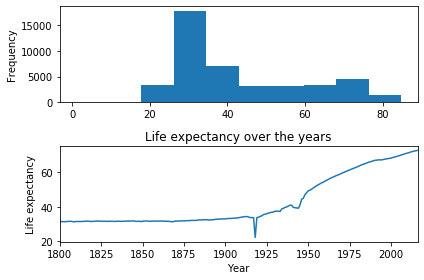

In [42]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
#gapminder.to_csv('gapminder.csv')
#gapminder_agg.to_csv('gapminder_agg.csv')